In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

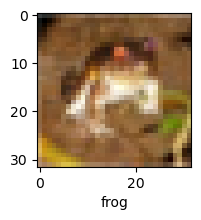

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-11-01 18:41:12.317507: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 39s 25ms/step - loss: 1.8131 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.6253 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 49s 32ms/step - loss: 1.5416 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4819 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4334 - accuracy: 0.4932


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 6s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.43      0.51      1000
           1       0.55      0.56      0.55      1000
           2       0.42      0.35      0.38      1000
           3       0.36      0.32      0.34      1000
           4       0.50      0.31      0.38      1000
           5       0.47      0.26      0.33      1000
           6       0.52      0.53      0.53      1000
           7       0.45      0.59      0.51      1000
           8       0.77      0.35      0.48      1000
           9       0.30      0.80      0.44      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.45     10000
weighted avg       0.50      0.45      0.45     10000



In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 21ms/step - loss: 1.4634 - accuracy: 0.4759
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0945 - accuracy: 0.6185
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9643 - accuracy: 0.6677
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8751 - accuracy: 0.6963
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8139 - accuracy: 0.7167
Epoch 6/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.7499 - accuracy: 0.7378
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7059 - accuracy: 0.7545
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6586 - accuracy: 0.7701
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6182 - accuracy: 0.7847
Epoch 10/10
1563/1563 [==============================] - 43s 28m

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9465 - accuracy: 0.6954


[0.946532130241394, 0.6953999996185303]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[7.0373812e-03, 1.1833412e-04, 1.2153331e-02, 7.2213310e-01,
        2.5706197e-04, 1.8974271e-01, 6.4061657e-02, 1.6299706e-04,
        3.2362833e-03, 1.0971706e-03],
       [4.0906592e-04, 7.7418998e-02, 8.9305358e-06, 4.4499768e-07,
        3.2463308e-07, 1.1120486e-07, 2.4230689e-08, 7.2080161e-07,
        9.2132097e-01, 8.4045372e-04],
       [4.2189604e-01, 1.9257745e-02, 3.1795613e-02, 4.0809531e-02,
        3.7926580e-03, 4.8615029e-03, 4.1491311e-04, 6.3349316e-03,
        3.9939877e-01, 7.1438231e-02],
       [9.4238943e-01, 9.2450215e-04, 4.6360236e-02, 1.9518234e-04,
        5.9453385e-05, 8.6719283e-06, 9.6225240e-06, 8.6094878e-05,
        9.9168476e-03, 4.9824612e-05],
       [2.4094413e-06, 5.1879288e-05, 8.2287844e-03, 1.3101281e-02,
        7.3501831e-01, 2.2255955e-03, 2.4121729e-01, 4.2764528e-05,
        2.5453519e-05, 8.6310145e-05]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

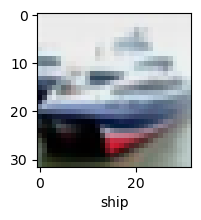

In [21]:
plot_sample(X_test, y_test,1)

In [22]:
classes[y_classes[1]]

'ship'

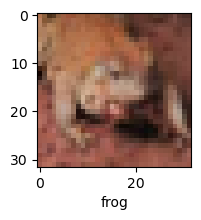

In [32]:
plot_sample(X_test, y_test,5)

In [31]:
classes[y_classes[5]]

'frog'

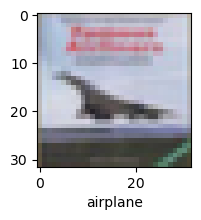

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'